In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import scipy
import warnings
warnings.filterwarnings('ignore')

In [51]:
amoc_full = np.load('Data/CESM1LE_AMOCIndex_1920-2005_region20to30_componentall_detrend0.npy')
nao_full = np.load('Data/CESM1LE_NAOIndex_1920-2005_detrend0.npy')[:,:,0]
amv_full = np.load('Data/CESM1LE_AMVIndex_1920-2005_detrend0_filter0.npy')

In [56]:
amoc_mean = np.mean(amoc_full,axis=1)
amoc_std = np.std(amoc_full,axis=1)
nao_mean = np.mean(nao_full,axis=1)
nao_std = np.std(nao_full,axis=1)
amv_mean = np.mean(amv_full,axis=1)
amv_std = np.std(amv_full,axis=1)

In [163]:
# loop through time to normalize data
amoc = np.zeros((42,1032))
nao = np.zeros((42,1032))
amv = np.zeros((42,1032))
for it in range(1032):
    amoc[:,it] = (amoc_full[:,it]-amoc_mean)/amoc_std
    nao[:,it] = (nao_full[:,it]-nao_mean)/nao_std
    amv[:,it] = (amv_full[:,it]-amv_mean)/amv_std

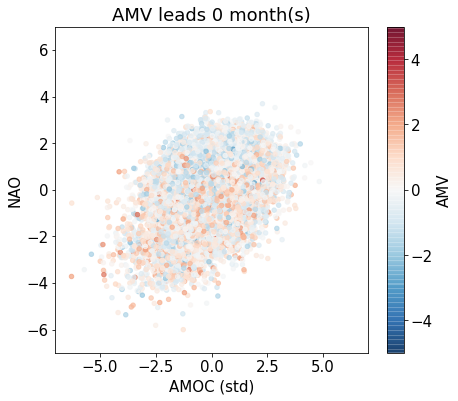

In [164]:
# change AMV lead months
lead = 0
#


amoc_flattern = amoc[:,0:1032-lead].reshape(42*(1032-lead))
nao_flattern = nao[:,0:1032-lead].reshape(42*(1032-lead))
amv_flattern = amv[:,lead:].reshape(42*(1032-lead))

plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 15})

sc = plt.scatter(amoc_flattern,nao_flattern,c=amv_flattern,vmin=-5,vmax=5,cmap='RdBu_r',s=20,alpha=0.7)
plt.colorbar(sc,label='AMV')
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.xlabel('AMOC (std)')
plt.ylabel('NAO')
plt.title('AMV leads '+str(lead)+' month(s)')
plt.show()

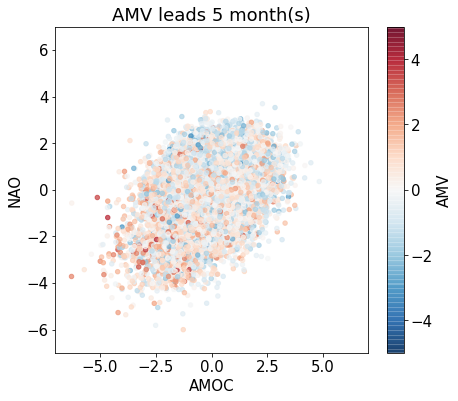

In [193]:
# change AMV lead months
lead = 5
#

amoc_flattern = amoc[:,0:1032-lead].reshape(42*(1032-lead))
nao_flattern = nao[:,0:1032-lead].reshape(42*(1032-lead))
amv_flattern = amv[:,lead:].reshape(42*(1032-lead))

plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 15})

sc = plt.scatter(amoc_flattern,nao_flattern,c=amv_flattern,vmin=-5,vmax=5,cmap='RdBu_r',s=20,alpha=0.7)
plt.colorbar(sc,label='AMV')
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.xlabel('AMOC')
plt.ylabel('NAO')
plt.title('AMV leads '+str(lead)+' month(s)')
plt.show()

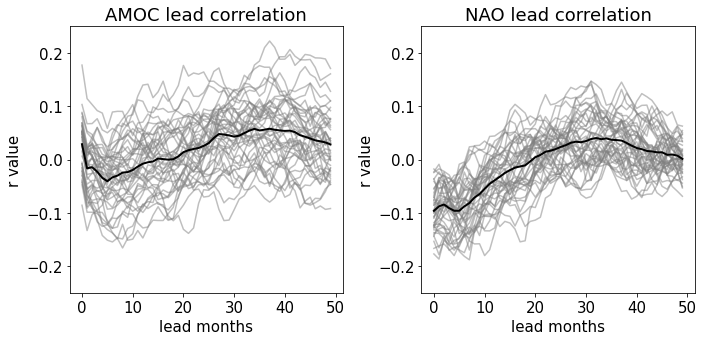

In [219]:
lead_months = 50

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
amoc_lead_corrs = []
nao_lead_corrs = []
for iens in range(42):
    amoc_lead_corr = []
    nao_lead_corr = []
    for ilead in range(lead_months):
        amoc_lead_corr.append( np.corrcoef(amoc[iens,0:1032-ilead],amv[iens,ilead:])[0,1] )
        nao_lead_corr.append( np.corrcoef(nao[iens,0:1032-ilead],amv[iens,ilead:])[0,1] )
    amoc_lead_corrs.append(amoc_lead_corr)
    nao_lead_corrs.append(nao_lead_corr)
    
    plt.subplot(121)
    plt.plot(np.arange(0,lead_months,1),amoc_lead_corr,color='gray',alpha=0.5)
    plt.xlabel('lead months')
    plt.ylabel('r value')
    plt.title('AMOC lead correlation')
    plt.ylim([-0.25,0.25])


    plt.subplot(122)
    plt.plot(np.arange(0,lead_months,1),nao_lead_corr,color='gray',alpha=0.5)
    plt.xlabel('lead months')
    plt.ylabel('r value')
    plt.title('NAO lead correlation')
    plt.ylim([-0.25,0.25])

plt.subplot(121)
plt.plot(np.arange(0,lead_months,1),np.mean(amoc_lead_corrs,axis=0),color='k',alpha=1,linewidth=2)

plt.subplot(122)
plt.plot(np.arange(0,lead_months,1),np.mean(nao_lead_corrs,axis=0),color='k',alpha=1,linewidth=2)

plt.tight_layout()

In [223]:
print( np.max( np.mean(amoc_lead_corrs,axis=0) ) )
print( np.min( np.mean(amoc_lead_corrs,axis=0) ) )

0.057734834327758555
-0.040783578654396725


In [224]:
print( np.max( np.mean(nao_lead_corrs,axis=0) ) )
print( np.min( np.mean(nao_lead_corrs,axis=0) ) )

0.040242929856233484
-0.09626012397732014


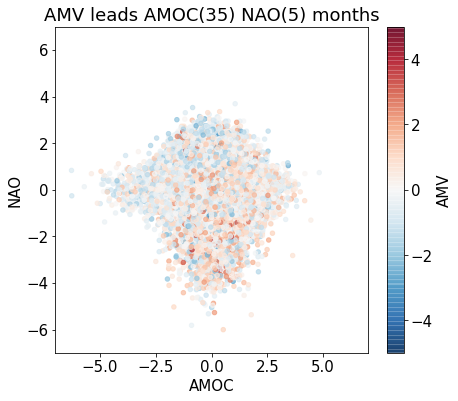

In [207]:
# optimal: amoc lead 35 months, nao lead 5 months
amoc_lead = 35
nao_lead = 5


amoc_flattern = amoc[:,0:1032-amoc_lead].reshape(42*(1032-amoc_lead))
nao_flattern = nao[:,(amoc_lead-nao_lead):1032-nao_lead].reshape(42*(1032-amoc_lead))
amv_flattern = amv[:,amoc_lead:].reshape(42*(1032-amoc_lead))

plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 15})

sc = plt.scatter(amoc_flattern,nao_flattern,c=amv_flattern,vmin=-5,vmax=5,cmap='RdBu_r',s=20,alpha=0.7)
plt.colorbar(sc,label='AMV')
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.xlabel('AMOC')
plt.ylabel('NAO')
plt.title('AMV leads AMOC('+str(amoc_lead)+') NAO('+str(nao_lead)+') months')
plt.show()